<a href="https://colab.research.google.com/github/y109240/dataAnalysis/blob/main/%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%E1%84%80%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A9%E1%86%BC%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5_%E1%84%80%E1%85%AE%E1%84%8A%E1%85%B5%E1%84%85%E1%85%B3%E1%86%AF%E1%84%8E%E1%85%A1%E1%86%BD%E1%84%8B%E1%85%A1%E1%84%85%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석 - 구씨를 찾아라!

## [질문]
- **Q1. 우리나라 성씨 데이터 Top10은?**
- **Q2. 우리나라에서 '구씨'가 가장 많이 사는 지역은?**

In [ ]:
# (코랩에서) 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,800 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire



---



### #.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

## Q1. 우리나라 성씨 데이터 Top10은?

---

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [52]:
# macOS에서 한글 적용하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
fe = fm.FontEntry(fname='r/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name="NanumGothic")
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':13, 'font.family':'NanumGothic'})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 멧플롯립 한글폰트 지정
# plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트
# plt.rc('font', family='Malgun Gothic')     # 윈도우 폰트
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 보이기

### 1.데이터 다운로드하기

- 국가통계포털 사이트  https://kosis.kr/index/index.do
- 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - ./data/성씨ㆍ본관별_인구__시군구_20240408173249.csv

---

### 2.데이터 불러오기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [7]:
# 파일 읽어서 pandas DataFrame으로 만들기
filename = './성씨ㆍ본관별_인구__시군구_20240423223515.csv'
df = pd.read_csv(filename)
df.head()

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601


### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

In [15]:
# 컬럼명 변경 --> ['성씨', '지역', '인구']
df.columns = ['성씨', '지역', '인구']
df.columns

# 전국 성씨 데이터 추출
df = df[(df['성씨'] != '계') & (df['지역'] == '전국')] # 조건별로 괄호로 묶어서
df = df.query(" 성씨 != '계' and 지역 == '전국' ")     # 쿼리문 이용가능
df.head()

,성씨,지역,인구
18,가(賈),전국,9936
36,간(簡),전국,2520
53,갈(葛),전국,2086
70,감(甘),전국,6024
88,강(姜),전국,1176847


#### @고유한 성씨만 출력하기

In [ ]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨'])
df['성씨'].unique()

In [17]:
# 고유한 성씨(한자포함) 총개수 출력하기
print(f"고유한 성씨(한자포함) 총개수 : {len(df['성씨'].unique())}")
print(f"고유한 성씨(한자포함) 목록  : {df['성씨'].unique()}")

고유한 성씨(한자포함) 총개수 : 154
고유한 성씨(한자포함) 목록  : ['가(賈)' '간(簡)' '갈(葛)' '감(甘)' '강(姜)' '강(康)' '견(甄)' '경(慶)' '경(景)' '계(桂)'
 '고(高)' '공(孔)' '곽(郭)' '구(丘)' '구(具)' '국(鞠)' '권(權)' '금(琴)' '기(奇)' '길(吉)'
 '김(金)' '나(羅)' '남(南)' '남궁(南宮)' '노(盧)' '노(魯)' '단(段)' '당(唐)' '도(都)' '도(陶)'
 '동(董)' '두(杜)' '라(羅)' '류(柳)' '마(馬)' '맹(孟)' '명(明)' '모(牟)' '목(睦)' '문(文)'
 '민(閔)' '박(朴)' '반(潘)' '방(房)' '방(方)' '배(裵)' '백(白)' '범(范)' '변(卞)' '변(邊)'
 '복(卜)' '봉(奉)' '부(夫)' '빈(賓)' '사(史)' '사공(司空)' '상(尙)' '서(徐)' '서문(西門)' '석(昔)'
 '석(石)' '선(宣)' '선우(鮮于)' '설(偰)' '설(薛)' '성(成)' '소(蘇)' '소(邵)' '손(孫)' '송(宋)'
 '승(承)' '시(施)' '시(柴)' '신(愼)' '신(申)' '신(辛)' '심(沈)' '안(安)' '양(梁)' '양(楊)'
 '어(魚)' '엄(嚴)' '여(余)' '여(呂)' '연(延)' '염(廉)' '예(芮)' '오(吳)' '옥(玉)' '온(溫)'
 '왕(王)' '용(龍)' '우(禹)' '원(元)' '위(魏)' '유(兪)' '유(劉)' '유(庾)' '유(柳)' '육(陸)'
 '윤(尹)' '은(殷)' '음(陰)' '이(李)' '인(印)' '임(任)' '임(林)' '장(張)' '장(章)' '장(蔣)'
 '전(全)' '전(田)' '전(錢)' '정(丁)' '정(程)' '정(鄭)' '제(諸)' '제갈(諸葛)' '조(曺)' '조(趙)'
 '좌(左)' '주(周)' '주(朱)' '지(智)' '지(池)' '진(晋)' '진(秦)' '진(陣)' '진(陳)' '차(車)'
 '채(蔡)' '천(千)' '최(催)' '최(

In [24]:
# 고유한 한글 성씨(한자미포함) 총개수
# - 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기

total = len(set(name.split('(')[0] for name in df.성씨.unique()))
names = set(name.split('(')[0] for name in df.성씨.unique())
# for name in df.성씨.unique():
#   tmp = name.split('(')[0]
#   print(tmp)

print(f"고유한 성씨(한자미포함) 총개수 : {total}")
print(f"고유한 성씨(한자미포함) 목록  : {sorted(list(names))}")

고유한 성씨(한자미포함) 총개수 : 120
고유한 성씨(한자미포함) 목록  : ['가', '간', '갈', '감', '강', '견', '경', '계', '고', '공', '곽', '구', '국', '권', '금', '기', '기타', '길', '김', '나', '남', '남궁', '노', '단', '당', '도', '동', '두', '라', '류', '마', '맹', '명', '모', '목', '문', '민', '박', '반', '방', '배', '백', '범', '변', '복', '봉', '부', '빈', '사', '사공', '상', '서', '서문', '석', '선', '선우', '설', '성', '소', '손', '송', '승', '시', '신', '심', '안', '양', '어', '엄', '여', '연', '염', '예', '오', '옥', '온', '왕', '용', '우', '원', '위', '유', '육', '윤', '은', '음', '이', '인', '임', '장', '전', '정', '제', '제갈', '조', '좌', '주', '지', '진', '차', '채', '천', '최', '추', '탁', '태', '팽', '편', '표', '피', '하', '한', '함', '허', '현', '형', '호', '홍', '황', '황보']


- '성씨'에서 한글만 추출하여 '성씨'컬럼으로 만들기

In [25]:
# '성씨'에서 한글만 추출하여 '성씨'컬럼으로 만들고 df_all로 만들기
# - 하나씩 불러와서 처리하는 방법
df_all = df.copy()
for idx in df_all.index:
  fname = df_all.loc[idx, '성씨'].split('(')[0]
  df_all.loc[idx, '성씨'] = fname

df_all.head()

,성씨,지역,인구
18,가,전국,9936
36,간,전국,2520
53,갈,전국,2086
70,감,전국,6024
88,강,전국,1176847


- 한글 성씨별로 그룹핑하기(한자를 다르게 쓰는 ['성씨'] 합하기)

In [ ]:
# 한글 성씨별로 그룹핑하여 df_all_group으로 지정하기
df_all_group = df_all.groupby('성씨').sum(numeric_only=True)

# df_all[df_all['성씨'] == '이']
# df_all[df_all.성씨 == '이']

- 인구 순으로 Top10 (내림차순 정렬하기)

In [33]:
# '인구' 크기순으로 Top10 (내림차순 정렬하기)
df_all_group.sort_values(by='인구', ascending=False).head(10)
# df_all.groupby('성씨').sum(numeric_only=True).sort_values('인구', ascending=False).head(10)

,인구
성씨,
김,10689959
이,7306828
박,4192074
정,2407365
최,2340509
조,1453827
강,1268472
윤,1020547
장,1019993


### 4.데이터 시각화하기

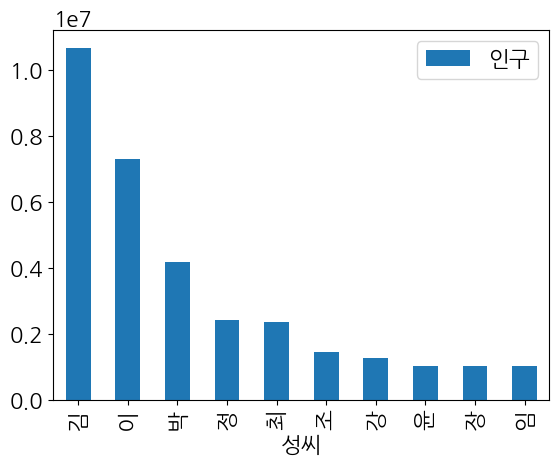

In [35]:
# 막대 그래프로 나타내기
data = df_all_group.sort_values(by='인구', ascending=False).head(10)

# 방법1
# x = data.index
# y = data.인구 # data['인구']
# plt.bar(x, y)

# 방법2
data.plot(kind='bar')
plt.show()

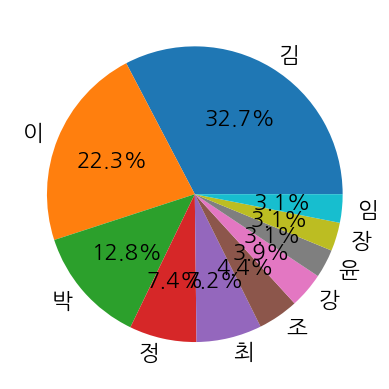

In [38]:
# 파이 그래프로 나타내기
plt.pie(data.인구, labels=data.index ,autopct='%1.1f%%')
plt.show()

### 5.파일로 저장하기

In [39]:
# 파일명 지정하여 저장하기
data.to_csv('family_name_top10.csv', encoding='utf-8')

----------------------------------

## Q2. 우리나라에서 '구씨'가 가장 많이 사는 지역은?

### 1.데이터 다운로드하기

### 2.데이터 불러오기

In [40]:
# 파일 읽어서 pandas DataFrame으로 만들기
filename = './성씨ㆍ본관별_인구__시군구_20240423223515.csv'
df = pd.read_csv(filename)
df.head(5)

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601


### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

In [43]:
# 컬럼명 변경 --> ['성씨', '지역', '인구']
df.columns = ['성씨', '지역', '인구']

# 성씨는 '계'가 아니고 지역은 '전국'이 아닌 성씨 데이터 추출
df = df[(df.성씨 != '계') & (df.지역 != '전국')]
df = df.query(" 성씨 != '계' and 지역 != '전국' ")
df.head()

,성씨,지역,인구
19,가(賈),서울특별시,1606
20,가(賈),부산광역시,118
21,가(賈),대구광역시,46
22,가(賈),인천광역시,1349
23,가(賈),광주광역시,21


#### @[성씨]가  '구'인 데이터 추출하기

In [44]:
# [성씨] 열에서 '구'가 포함된 데이터 출력 & df_foo로 지정하기
df_goo = df[df.성씨.str.contains('구')]
df_goo

,성씨,지역,인구
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781
257,구(丘),강원도,217


### **[실습문제] 자신의 성씨 데이터 출력하기**


In [46]:
family_name = '이'
df_lee = df[df.성씨.str.contains(family_name)]
df_lee

,성씨,지역,인구
1855,이(李),서울특별시,1441796
1856,이(李),부산광역시,469587
1857,이(李),대구광역시,374123
1858,이(李),인천광역시,424803
1859,이(李),광주광역시,179688
1860,이(李),대전광역시,230292
1861,이(李),울산광역시,167221
1862,이(李),세종특별자치시,30455
1863,이(李),경기도,1856028
1864,이(李),강원도,216909


#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [84]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기 (groupby)
df_goo_group = df_goo.groupby('지역').sum(numeric_only=True)

# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기 (sort_values)
df_goo_group = df_goo_group.sort_values(by='인구', ascending=False)
df_goo_group

,인구
지역,
경기도,47572
서울특별시,38857
경상남도,20367
부산광역시,17871
대구광역시,15313
인천광역시,12028
충청남도,10061
경상북도,10000
대전광역시,6295


### **[실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [89]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_lee_group = df_lee.groupby('지역').sum(numeric_only=True).sort_values(by='인구', ascending=False)
df_lee_group

,인구
지역,
경기도,1856028
서울특별시,1441796
부산광역시,469587
경상남도,441464
인천광역시,424803
경상북도,391378
대구광역시,374123
충청남도,327336
전라북도,251483


---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [49]:
df_goo_group.columns

Index(['인구'], dtype='object')

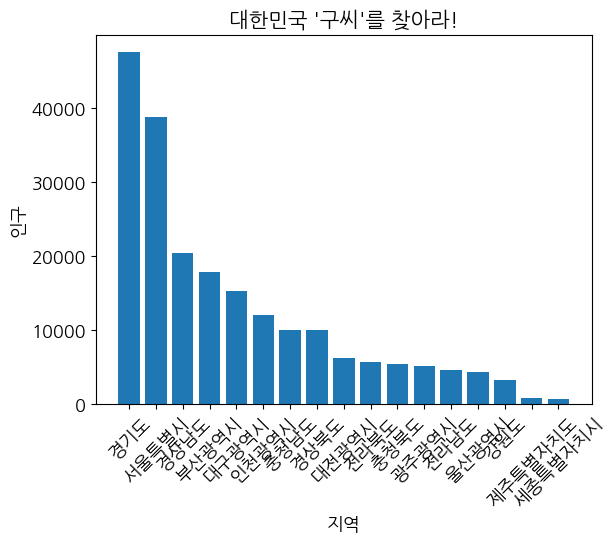

In [53]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index  # 지역
y = df_goo_group.인구    # 인구수

# 2.막대 그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.title("대한민국 '구씨'를 찾아라!", fontsize=15)     # 그래프 제목
plt.xlabel('지역')           # x축 이름
plt.ylabel('인구')           # y축 이름
plt.xticks(rotation=45)     # X축 레이블 회전
plt.show()                  # 그래프 출력하기

#### @그래프 꾸미기

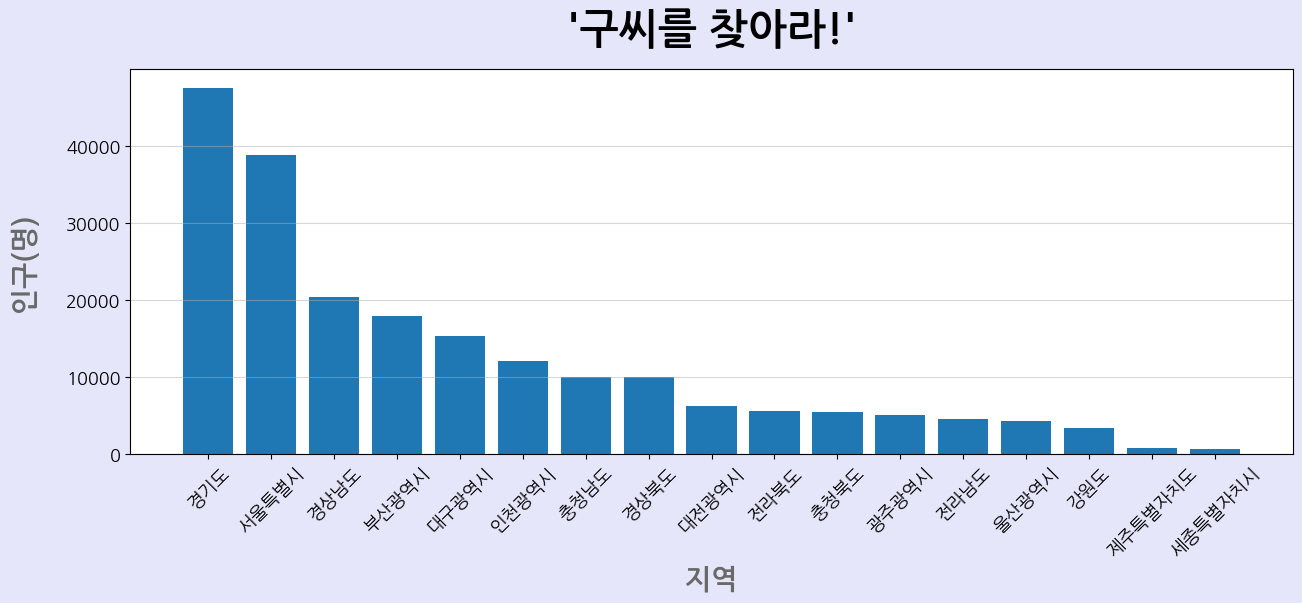

In [57]:
import matplotlib.pyplot as plt

# 1. 그래프 데이터 지정하기 (x축, y축)
x = df_goo_group.index # 지역
y = df_goo_group.인구   # 인구수

# 2. 막대그래프 그리기
plt.figure(figsize=(15,5), facecolor='lavender') # 그래프 크기와 색상
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.title("'구씨를 찾아라!'", pad=20,
          fontdict={'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict={'size':20, 'color':'dimgray', 'weight':'bold'})
plt.ylabel('인구(명)', fontdict={'size':20, 'color':'dimgray', 'weight':'bold'}, labelpad=20)
plt.xticks(rotation = 45)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

#### @선 그래프로 시각화하기

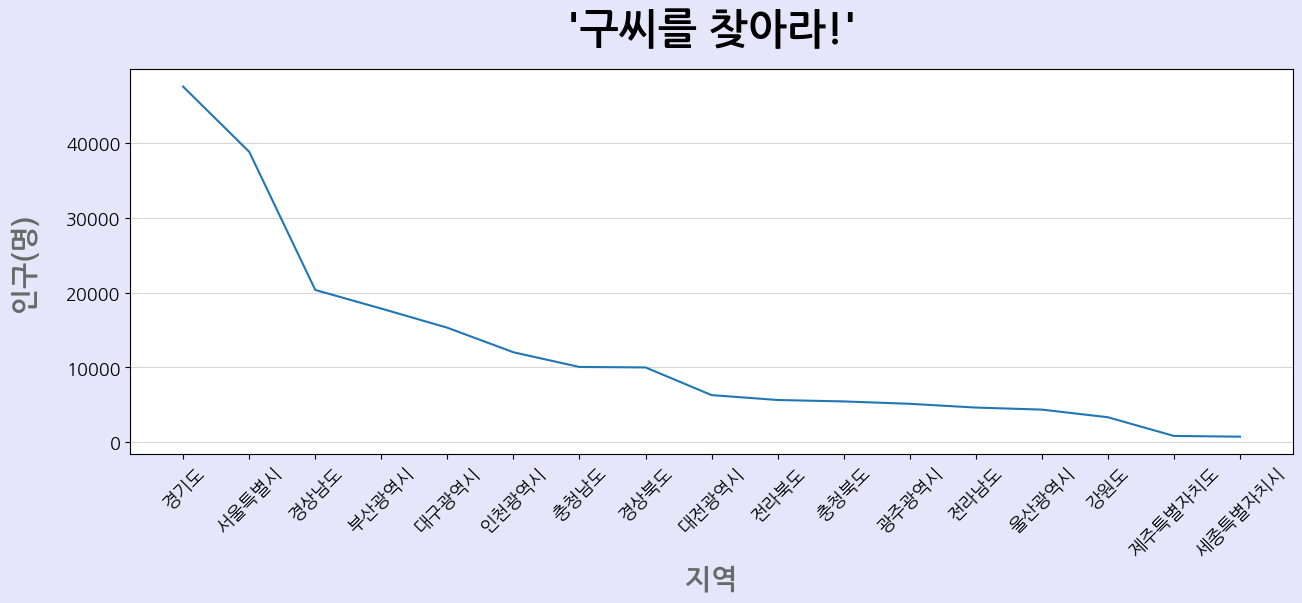

In [63]:
import matplotlib.pyplot as plt

# 1. 그래프 데이터 지정하기 (x축, y축)
x = df_goo_group.index
y = df_goo_group.인구

# 2. 선그래프 그리기
plt.figure(figsize=(15,5), facecolor='lavender')
plt.plot(x, y)

# 3. 그래프 꾸미기
plt.title("'구씨를 찾아라!'", pad=20,
          fontdict={'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict={'size':20, 'color':'dimgray', 'weight':'bold'})
plt.ylabel('인구(명)', fontdict={'size':20, 'color':'dimgray', 'weight':'bold'}, labelpad=20)
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

#### @혼합 그래프

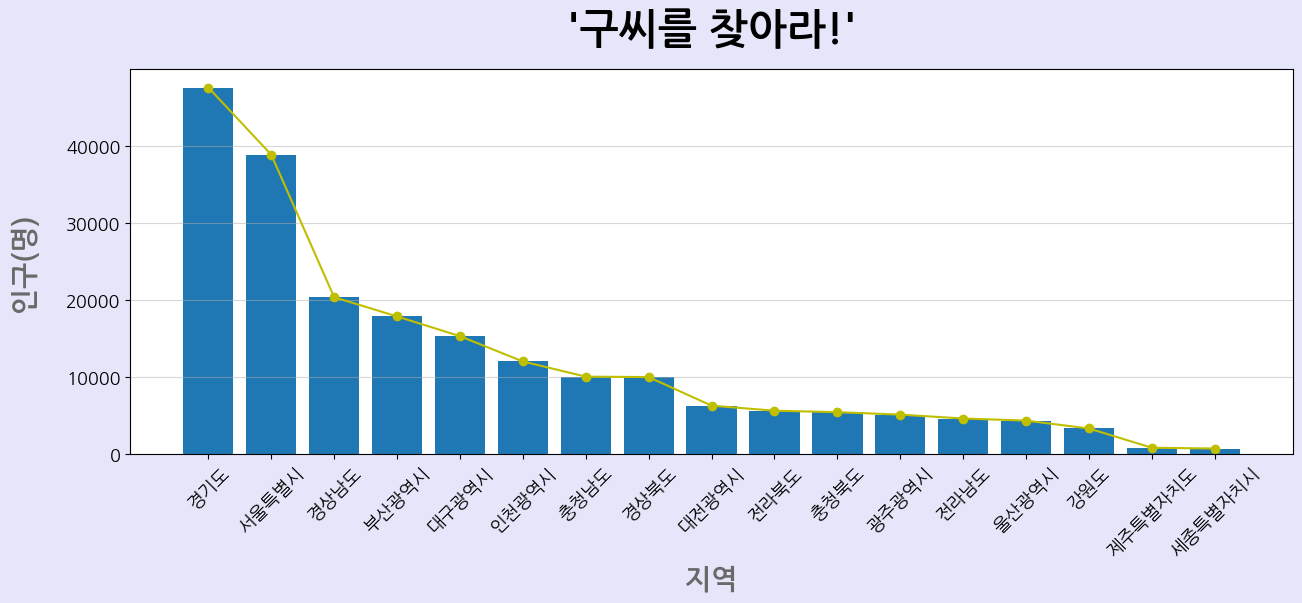

In [70]:
import matplotlib.pyplot as plt

# 1. 그래프 데이터 지정하기(x축, y축)
x = df_goo_group.index
y = df_goo_group.인구

# 2. 혼합 그래프 그리기
plt.figure(figsize=(15,5), facecolor='lavender')
plt.bar(x, y)
plt.plot(x, y, '-oy')

# 3. 그래프 꾸미기
plt.title("'구씨를 찾아라!'", pad=20,
          fontdict={'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict={'size':20, 'color':'dimgray', 'weight':'bold'})
plt.ylabel('인구(명)', fontdict={'size':20, 'color':'dimgray', 'weight':'bold'}, labelpad=20)
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.5)
plt.savefig('family_name_goo.png') # 이미지 파일로 저장
plt.show()

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [71]:
# 파일명 지정하여 저장하기
file = './family_name_goo.csv'
df_goo_group.to_csv(file, encoding='utf-8', mode='w') # 윈도우 코랩은 인코딩 'cp949'

-----------------------------------------

### **[실습문제] 워드클라우드로 시각화하기**

In [ ]:
# 라이브러리 설치하기
!pip install wordcloud

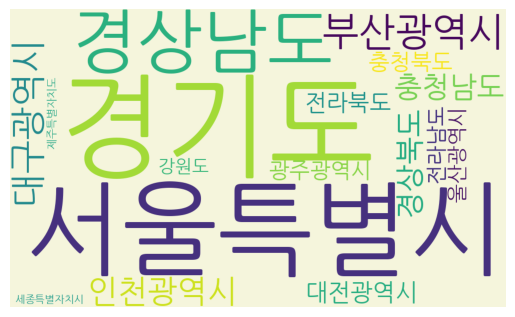

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 한글폰트 경로 설정
font_path = 'r/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 2. 전처리된 데이터 지정하기 (딕셔너리 형태로 지정해야 함)
# - (토큰명, 빈도수) 딕셔너리 타입으로 변환
# - (지역, 인구)
data = dict(zip(df_goo_group.index, df_goo_group.인구))

# 3. 워드클라우드 그래프로 시각화하기
wc = WordCloud(width=1000, height=600,
               background_color='beige',
               font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4. 파일로 저장하기
wc.to_file('./구씨_워드클라우드.png')

#### **@투명한 이미지(알파값이 적용된)에 워드 클라우드 나타내기**
마스크 이미지 파일이 필요하다.

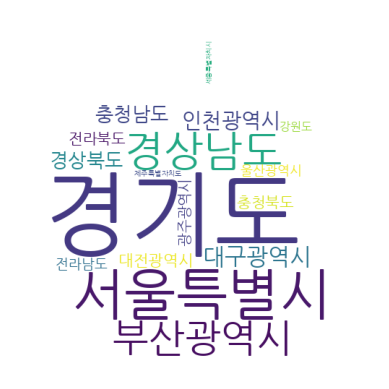

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. 한글폰트 경로 설정
font_path = 'r/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 2. (토큰명, 빈도수) 딕셔너리형태로 전처리된 데이터 지정
data = dict(zip(df_goo_group.index, df_goo_group.인구))

# 3. 워드클라우드로 그래프 시각화
img = cv2.imread('./apple.png') # 알파값이 포함된 이미지 파일
img_array = np.array(img)
wc = WordCloud(background_color='white',
               font_path=font_path,
               max_font_size=250,
               mask=img_array)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file('./사과모양_워드클라우드.png')



---



### **[[미션]] **
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

In [90]:
df_lee_group.head()

,인구
지역,
경기도,1856028
서울특별시,1441796
부산광역시,469587
경상남도,441464
인천광역시,424803


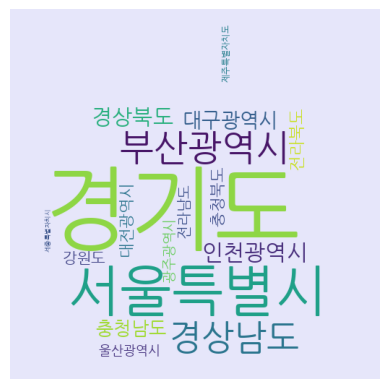

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
import numpy as np

font_path = 'r/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
data = dict(zip(df_lee_group.index, df_lee_group.인구))
img = cv2.imread('./apple.png')
img_array = np.array(img)
wc = WordCloud(background_color='lavender',
               font_path=font_path,
               max_font_size=250,
               mask=img_array)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

wc.to_file('./워드클라우드실습.png')

----------------------------------

THE END